#### http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html

In [8]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score,mean_absolute_error
from sklearn import grid_search
from sklearn.model_selection import train_test_split

In [9]:
boston = datasets.load_boston()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [14]:
# Setup a Decision Tree Regressor
regressor = DecisionTreeRegressor()

parameters = {
    'max_depth':(1,2,3,4,5,6,7,8,9,10),
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [5, 10, 20],
}

regressors = grid_search.GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
regressors.fit(boston.data, boston.target)

# pick the best
reg = regressors.best_estimator_

# Fit the learner to the training data
reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
import matplotlib.pyplot as plt
Y_pred = reg.predict(X_test)

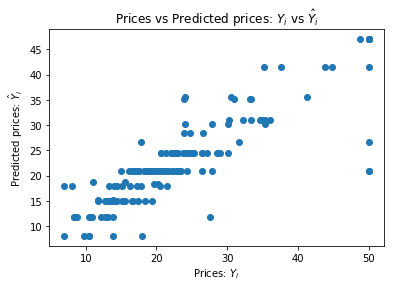

In [17]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [16]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

26.805417132


In [7]:
print(Y_test[:5])
print(Y_pred[:5])

[ 37.6  27.9  22.6  13.8  35.2]
[ 47.14666667  28.02380952  21.78134328   8.04615385  47.14666667]
